In [1]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
from math import factorial
newparams = {'figure.figsize': (16.0, 8.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [2]:
def divdiff(xdata,ydata):
    # Create the table of divided differences based
    # on the data in the arrays x_data and y_data. 
    n = len(xdata)
    F = zeros((n,n))
    F[:,0] = ydata             # Array for the divided differences
    for j in range(n):
        for i in range(n-j-1):
            F[i,j+1] = (F[i+1,j]-F[i,j])/(xdata[i+j+1]-xdata[i])
    return F                    # Return all of F for inspection. 
                                # Only the first row is necessary for the
                                # polynomial.

def newton_interpolation(F, xdata, x):
    # The Newton interpolation polynomial evaluated in x. 
    n, m = shape(F)
    xpoly = ones(len(x))               # (x-x[0])(x-x[1])...
    newton_poly = F[0,0]*ones(len(x))  # The Newton polynomial
    for j in range(n-1):
        xpoly = xpoly*(x-xdata[j])
        newton_poly = newton_poly + F[0,j+1]*xpoly
    return newton_poly

# 1d

n =  2: x = 1.74129, error: -9.24e-03
n =  4: x = 1.73270, error: -6.54e-04
n =  8: x = 1.73206, error: -6.12e-06
n = 16: x = 1.73205, error:  8.21e-07


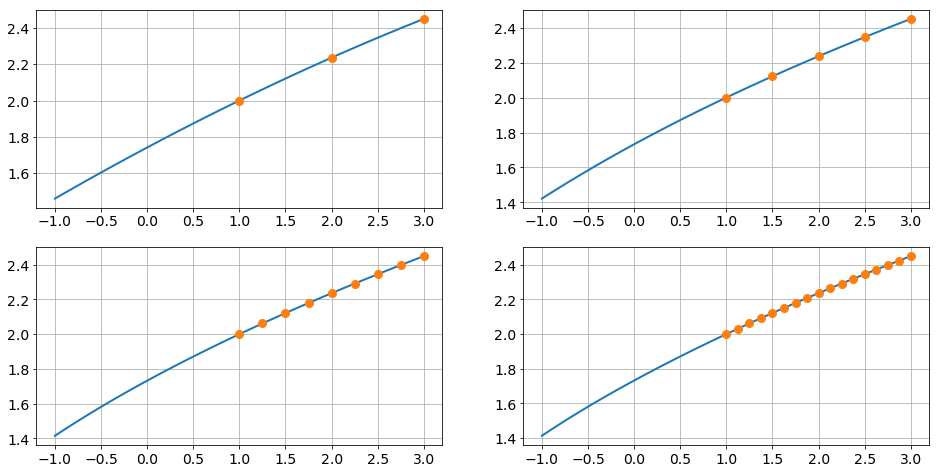

In [10]:
def f(x):
    return sqrt(x + 3)

n = 2
count=0
x=linspace(-1,3,101)
while n <= 16:
    xdata = linspace(1, 3, n + 1)
    ydata = [f(x) for x in xdata]

    F = divdiff(xdata, ydata)

    x2 = [0]
    p = newton_interpolation(F, xdata, x2)
    p2= newton_interpolation(F,xdata,x)
    
    subplot(221+count)
    plot(x, p2)
    plot(xdata, ydata, 'o')

    print(f'n = {f"{n}".rjust(2)}: x = {p[0]:.5f}, error: {str(f"{sqrt(3) - p[0]:.2e}").rjust(9)}')
    
    n *= 2
    count+=1
   

# 3c

In [11]:
def simpson(f, a, b, m=10):
    n = 2*m
    x_noder = linspace(a, b, n+1)   
    h = (b-a)/n                         
    S1 = f(x_noder[0]) + f(x_noder[n])  
    S2 = sum(f(x_noder[1:n:2]))         
    S3 = sum(f(x_noder[2:n-1:2]))       
    S = h*(S1 + 4*S2 + 2*S3)/3
    return S

def f(x):
    return exp(-x)

a, b = 1, 3
m = 22

i = exp(-1) - exp(-3)
s = simpson(f, a, b, m=m)

print(f'Estimate: {s}, actual: {i}, error: {i - s:.2e}')

Estimate: 0.3180923803455209, actual: 0.3180923728035784, error: -7.54e-09


# 4f

In [13]:
def gauss(f, a, b):
    c = (a + b) / 2
    h = (a - b) / 2
    return h * (5 * f(-sqrt(3 / 5) * h + c) \
                + 8 * f(c) \
                + 5 * f(sqrt(3 / 5) * h + c)) / 9

def gauss_basic(f, a, b):
    S1 = gauss(f, a, b)
    c = (a + b) / 2
    S2 = gauss(f, a, c) + gauss(f, c, b)
    error_estimate = (S2 - S1) / 63
    return S2, error_estimate

def f(n=1):
    def g(x):
        return x ** n
    return g
    
for n in range(0, 7):
    s2, error = gauss_basic(f(n), -1, 1)
    print(f'n={n}: value={f"{s2:.4f}".rjust(8)}, error={f"{error:.4f}".rjust(9)}')

n=0: value= -2.0000, error=   0.0000
n=1: value=  0.0000, error=   0.0000
n=2: value= -0.6667, error=   0.0000
n=3: value=  0.0000, error=   0.0000
n=4: value= -0.4000, error=   0.0000
n=5: value=  0.0000, error=   0.0000
n=6: value= -0.2850, error=  -0.0007


# 4g

In [33]:
def gauss_adaptive(f, a, b, tol, level=0, max_level=15, silent=True):
    
    Q, error_estimate = gauss_basic(f, a, b)
    
    if not silent:
        # -------------------------------------------------
        x = linspace(a, b, 101)
        plot(x, f(x), [a, b], [f(a), f(b)], '.r')
        title('The integrand and the subintervals')
        # -------------------------------------------------

    if level >= max_level:
        print('Warning: Maximum number of levels used.')
        return Q
    
    if abs(error_estimate) < tol:         # Accept the result, and return
        result =  Q+error_estimate    
    else:
        # Divide the interval in two, and apply the algorithm to each interval.
        c = 0.5*(b+a)
        result_left  = gauss_adaptive(f, a, c, tol = 0.5*tol, level = level+1,silent=True)
        result_right = gauss_adaptive(f, c, b, tol = 0.5*tol, level = level+1,silent=True)
        result = result_left + result_right
    return result

def f1(x):
    return exp(-x)

def f2(x):
    return 1 / (1 + 16 * x ** 2)

def f3(x):
    return 1 / ((x - 0.3) ** 2 + 0.01) + 1 / ((x - 0.9) ** 2 + 0.04)

In [34]:
testcases = [
    {
        "a": 1,
        "b": 3,
        "f": f1,
        "exact": exp(-1) - exp(-3),
    },
    {
        "a": 0,
        "b": 5,
        "f": f2,
        "exact": arctan(20) / 4,
    },
    {
        "a": 0,
        "b": 2,
        "f": f3,
        "exact": 41.326213804391148551,
    },
]

tolerances = [1.e-3, 1.e-6, 1.e-9]

for i, case in enumerate(testcases, start=1):
    print(f'\nFunction {i}:\n')
    for tol in tolerances:
        
        print(f'With tolerance {tol}:')

        result = -gauss_adaptive(case['f'], case['a'], case['b'], tol=tol, silent=True)

        print(f'Numerical solution = {result:8f}, exact solution = {case["exact"]:8f}')

        err = case['exact'] - result
        print(f'error = {abs(err):.3e}\n')


Function 1:

With tolerance 0.001:
Numerical solution = 0.318092, exact solution = 0.318092
error = 1.436e-08

With tolerance 1e-06:
Numerical solution = 0.318092, exact solution = 0.318092
error = 1.436e-08

With tolerance 1e-09:
Numerical solution = 0.318092, exact solution = 0.318092
error = 2.476e-13


Function 2:

With tolerance 0.001:
Numerical solution = 0.394190, exact solution = 0.380209
error = 1.398e-02

With tolerance 1e-06:
Numerical solution = 0.380209, exact solution = 0.380209
error = 1.045e-07

With tolerance 1e-09:
Numerical solution = 0.380209, exact solution = 0.380209
error = 1.688e-11


Function 3:

With tolerance 0.001:
Numerical solution = 41.335690, exact solution = 41.326214
error = 9.476e-03

With tolerance 1e-06:
Numerical solution = 41.326214, exact solution = 41.326214
error = 1.388e-07

With tolerance 1e-09:
Numerical solution = 41.326214, exact solution = 41.326214
error = 1.990e-13

